# 1. Data Size:
1. Dat
Data-driven approaches rely heavily on the availability of sufficient data. One of the key challenges in many fields is the lack of adequate data, especially where data collection is costly or resource-intensive.

2. Data Bias:
Traditional research often follows an incremental process, where innovations build upon existing materials. This can create a bias toward specific elements, limiting the diversity of data. As a result, data-driven methods tend to interpolate within the known dataset. To expand the discovery of new materials, incorporating active learning and exploration techniques is crucial.

This document provides a summary of MP data statistics, including:

The volume of data available across different APIs.
The compositional distribution of the data, along with visualizations presented as periodic table heatmaps.

In [135]:
# Make a periodic table heatmap

# 
import collections
import numpy as np
import pandas as pd
from typing import List, Dict
import json
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# MP
from mp_api.client import MPRester
from emmet.core.summary import HasProps
from pymatgen.core.periodic_table import ElementBase
from monty.serialization import loadfn, dumpfn


def plot_periodic_table_heat_map(value_dic, title=None, log_scale=True, save_file_path=None):
    
    """Generate periodic table heat map

        Args:
            value_dic (dict): a dictionary that key is pymatgen.core.periodic_table.Element, and 
                value is numeric (int or float). An example is given below:
                {
                    Element B: 13862,
                    Element O: 169665,
                    Element Nb: 11734,
                    Element Zn: 15099
                } 
            title (str): title name of the 
                generated plot. Defaults to None.
            log_scale (bool): True if colorbar in 
                log scale. Defaults to True.
            save_file_path (str): the output file path to store the 
                generated fig. Defaults to None.
    """
    
    def get_periodic_table() -> pd.DataFrame:  
    """Get the periodic table
    
        Returns:
            periodic_table_df(pd.DataFrame)
    """
    periodic_table_df = pd.DataFrame(columns=range(18), index=range(9))
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    for z in range(1, 119):
        e = ElementBase.from_Z(z)
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)

        periodic_table_df.loc[tem_row-1, tem_group-1] = e.name
    return(periodic_table_df)
    
    # get empty table DataFrame
    periodic_table_df = get_periodic_table()
    
    # default layout variables
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    periodic_table_count_np = np.full((9, 18), 10e-9)
    
    # iterate all element and get the corresponding value from value_dic
    for z in range(1, 119):
        e = ElementBase.from_Z(z)     
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)
        
        value = 10e-9
        if e in value_dic:
            value = value_dic[e]
        periodic_table_count_np[tem_row-1][tem_group-1] = value

        
    # plot
    fig, ax = plt.subplots(figsize=(8, 10))
    
    if log_scale:
        im = ax.imshow(periodic_table_count_np, cmap='hot', norm=LogNorm(vmin=min(value_dic.values()), vmax=max(value_dic.values())))
    else:
        im = ax.imshow(periodic_table_count_np, cmap='hot')
        
    # annotation
    for i in range(9):
        for j in range(18):
            if not pd.isna(periodic_table_df.loc[i, j]):
                ax.annotate(str(periodic_table_df.loc[i, j]), xy=(j, i),
                             ha='center', va='center', color='grey')
    
    if title:
        plt.title(title)
    plt.axis('off')
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    
    # save figure
    if save_file_path:
        plt.savefig(save_file_path)
    return()

In [19]:
from mp_api.client import MPRester
API_KEY = "API_KEY" # replace to your MP API key

In [11]:
# all avaliable api
api_list = ['absorption', 'bonds', 'chemenv', 'dielectric', 'elasticity', 
            'insertion_electrodes', 'electronic_structure', 'electronic_structure_bandstructure', 
            'electronic_structure_dos', 'eos', 'grain_boundaries', 'magnetism', 'oxidation_states', 
            'phonon', 'piezoelectric', 'provenance', 'similarity', 'substrates', 'summary', 
            'surface_properties', 'tasks', 'thermo', 'xas', 'robocrys', 'synthesis']

Retrieving BondingDoc documents:  97%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 154387/158398 [05:59<00:09, 429.67it/s]
Retrieving ChemEnvDoc documents: 154530it [06:18, 408.47it/s]                                                                                                               


chemenv


Retrieving EOSDoc documents: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 233/233 [00:01<00:00, 131.09it/s]


eos


Retrieving GrainBoundaryDoc documents:   9%|████████▏                                                                                      | 28/327 [00:00<00:06, 46.69it/s]/Users/chiupeter/Documents/material_informatics/api_development/api_dev_env/lib/python3.9/site-packages/pymatgen/core/structure.py:1228: UserWarning: Not all sites have property grain_label. Missing values are set to None.
  warnings.warn(f"Not all sites have property {key}. Missing values are set to None.")
Retrieving GrainBoundaryDoc documents: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 327/327 [00:04<00:00, 72.69it/s]


grain_boundaries


Retrieving PhononBSDOSDoc documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1513/1513 [00:05<00:00, 290.03it/s]


phonon


Retrieving ProvenanceDoc documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 154387/154387 [00:49<00:00, 3100.80it/s]


provenance


Retrieving SimilarityDoc documents: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 78880/78880 [00:45<00:00, 1729.82it/s]


similarity


Retrieving SubstratesDoc documents: 100%|████████████████████████████████████████████████████████████████████████████████████| 10640939/10640939 [7:26:32<00:00, 397.17it/s]


substrates


Retrieving SummaryDoc documents: 155361it [50:48, 50.97it/s]                                                                                                                
Retrieving SurfacePropDoc documents: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:05<00:00, 25.90it/s]


surface_properties


Retrieving TaskDoc documents: 1612896it [1:16:09, 35.53it/s]                                                                                                                

tasks


Retrieving TaskDoc documents: 1612896it [1:21:08, 331.28it/s]
Retrieving ThermoDoc documents:   0%|                                                                                                 | 263/341314 [00:02<29:17, 194.04it/s]/Users/chiupeter/Documents/material_informatics/api_development/api_dev_env/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
Retrieving ThermoDoc documents:   0%|                                                                                                 | 298/341314 [00:02<38:26, 147.85it/s]/Users/chiupeter/Documents/material_informatics/api_development/api_dev_env/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:289: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid er

xas


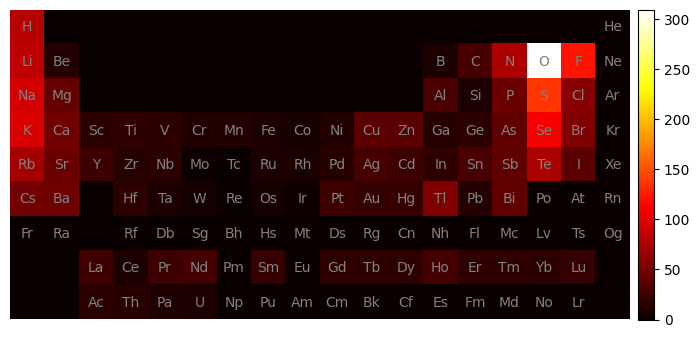

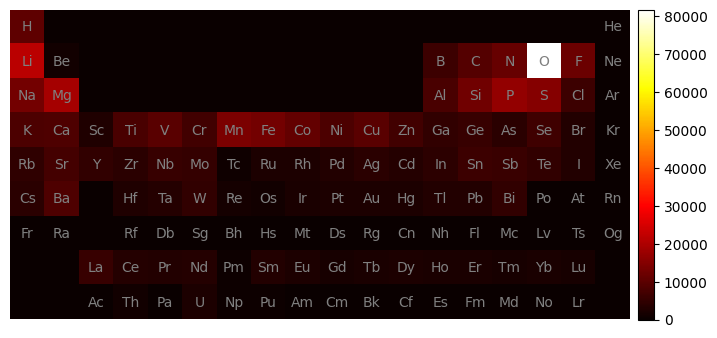

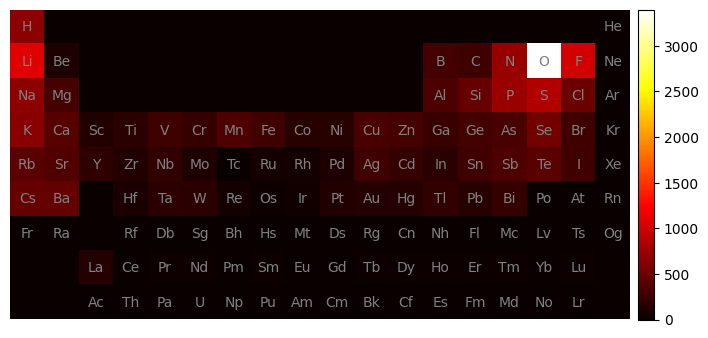

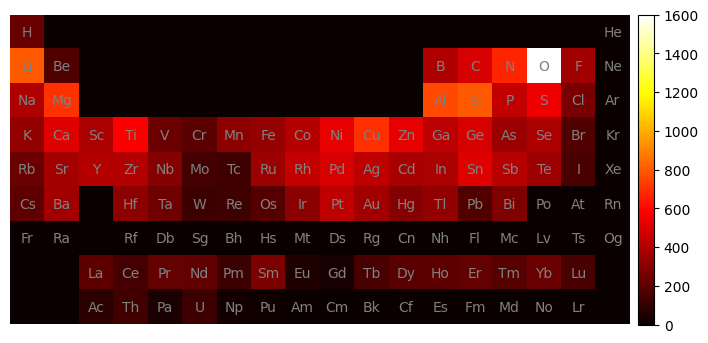

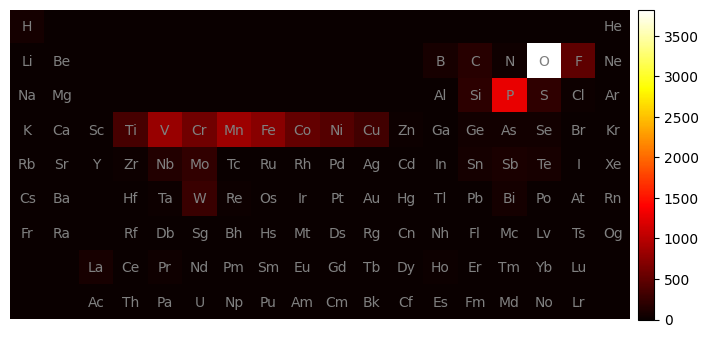

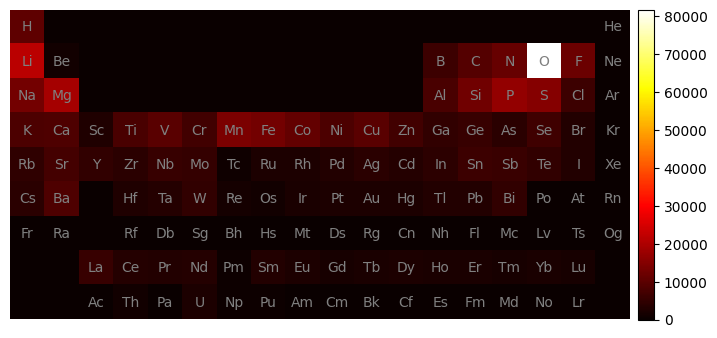

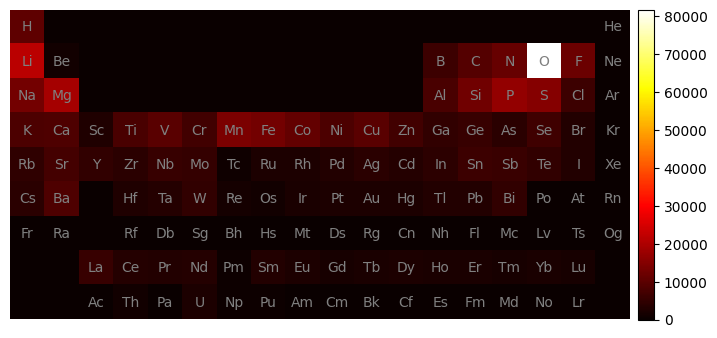

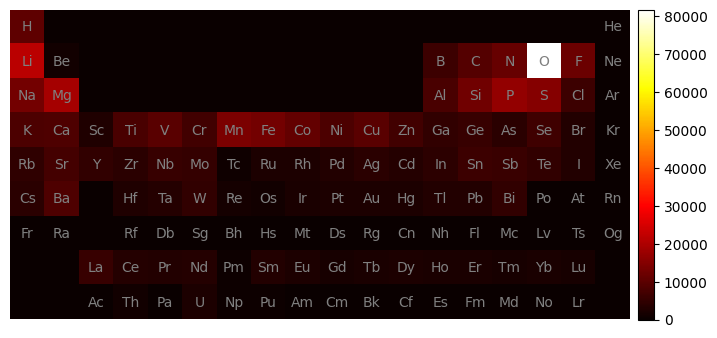

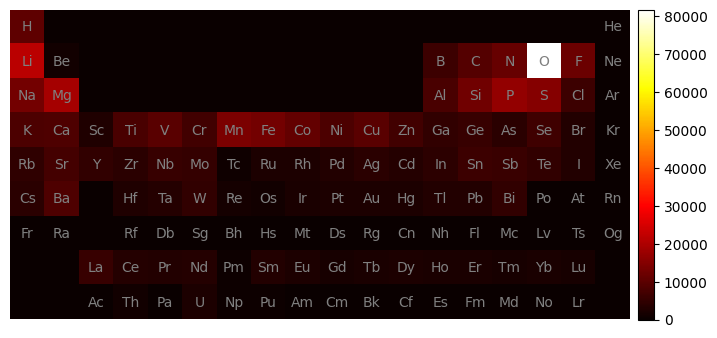

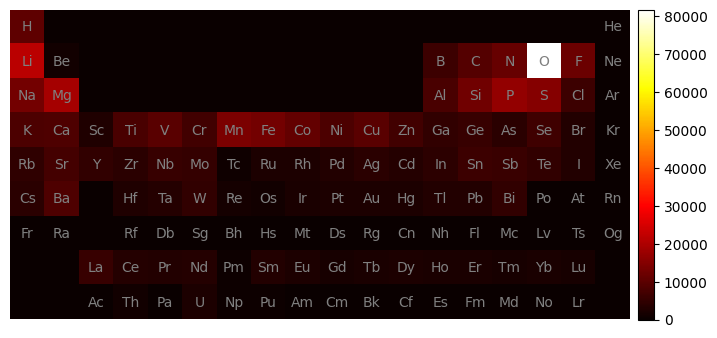

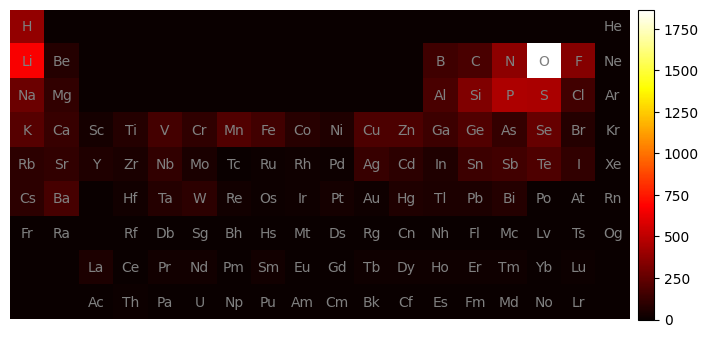

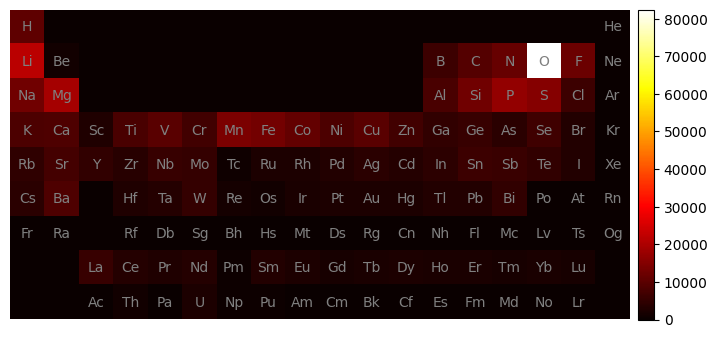

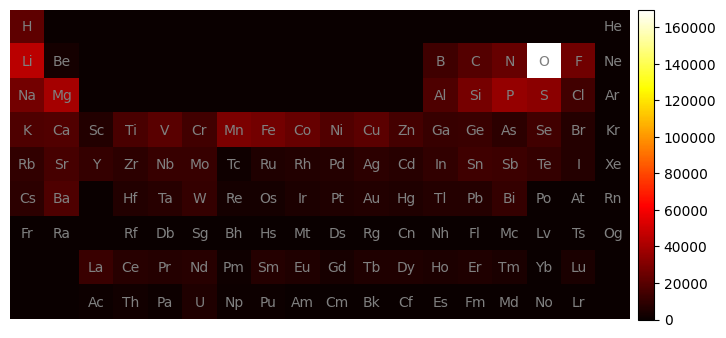

In [80]:
count_dict = dict()
with MPRester(API_KEY) as mpr:
    for api_name in api_list:
        try:
            api_class = getattr(mpr.materials, api_name)
            docs = api_class.search(fields=['task_id', 'elements'])
            dumpfn(docs, f"./output/{api_name}.csv")
            count_dict[api_class.__class__.__name__] = len(docs)
            
            # update element count in material
            element_dict = collections.defaultdict(int)
            element_str_dict = collections.defaultdict(int)
            for doc in docs:
                for element in doc.elements:
                    element_str_dict[element.name] += 1
                    element_dict[element] += 1
            with open(f"./output/count_ele_{api_name}.json", "w") as json_file:
                json.dump(element_str_dict, json_file)
                
            # plot
            plot_periodic_table_heat_map(element_dict, periodic_table_df, f"./output/count_ele_{api_name}.png")
            
            del docs
        except:
            print(api_name)
with open("./output/count.json", "w") as json_file:
    json.dump(count_dict, json_file)

all api data size

In [153]:
count_df = pd.DataFrame([count_dict]).T
count_df = count_df.reset_index()
count_df.columns = ['api_name', 'count']
count_df.sort_values('count', inplace=True)

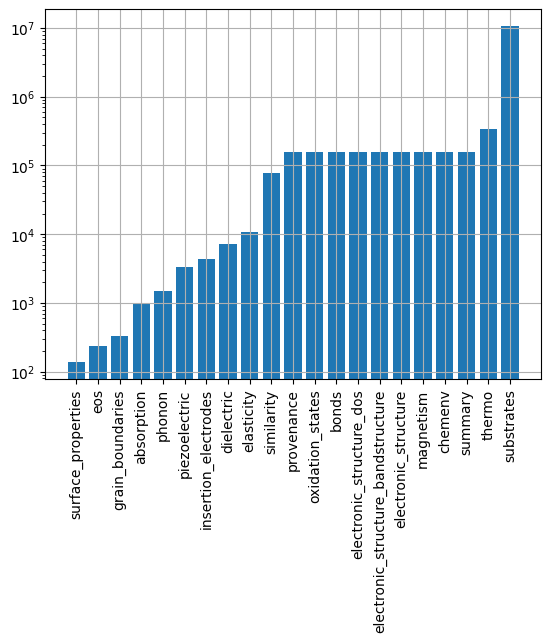

In [200]:
plt.bar(count_df['api_name'], count_df['count'], log=True)
plt.xticks(rotation=90)
plt.grid()

the data size of api with element information

In [165]:
api_with_element_list = ['absorption', 'bonds', 'dielectric', 'elasticity', 
            'insertion_electrodes', 'electronic_structure', 'electronic_structure_bandstructure', 
            'electronic_structure_dos', 'magnetism', 'oxidation_states', 'piezoelectric', 
            'summary', 'thermo']

In [166]:
count_df_with_element = count_df[count_df['api_name'].isin(api_with_element_list)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'absorption'),
  Text(1, 0, 'piezoelectric'),
  Text(2, 0, 'insertion_electrodes'),
  Text(3, 0, 'dielectric'),
  Text(4, 0, 'elasticity'),
  Text(5, 0, 'oxidation_states'),
  Text(6, 0, 'bonds'),
  Text(7, 0, 'electronic_structure_dos'),
  Text(8, 0, 'electronic_structure_bandstructure'),
  Text(9, 0, 'electronic_structure'),
  Text(10, 0, 'magnetism'),
  Text(11, 0, 'summary'),
  Text(12, 0, 'thermo')])

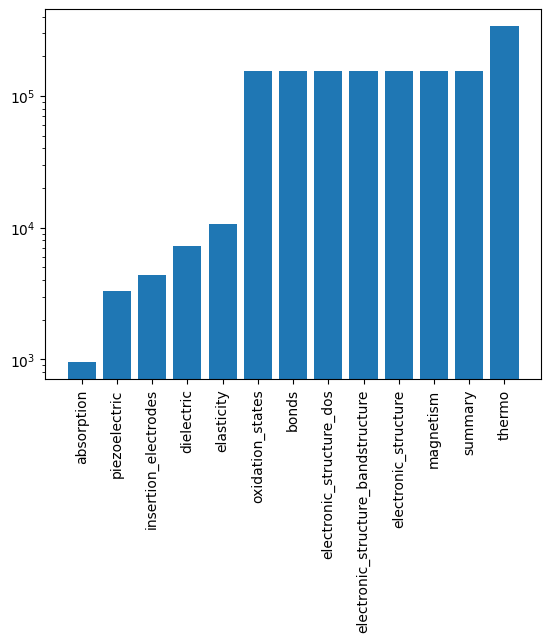

In [170]:
plt.bar(count_df1['api_name'], count_df1['count'], log=True)
plt.xticks(rotation=90)

In [191]:
# reduce previous plot for clarity. 
# The following api have identical elemental information: 
# ['bonds', 'oxidation_states', 'electronic_structure_dos', 'electronic_structure_bandstructure',
# 'electronic_structure', 'magnetism']

api_distinct_list = ['absorption', 'dielectric', 'elasticity', 
            'insertion_electrodes', 'electronic_structure', 'piezoelectric', 
            'summary', 'thermo']

count_df_distinct = count_df[count_df['api_name'].isin(api_distinct_list)]

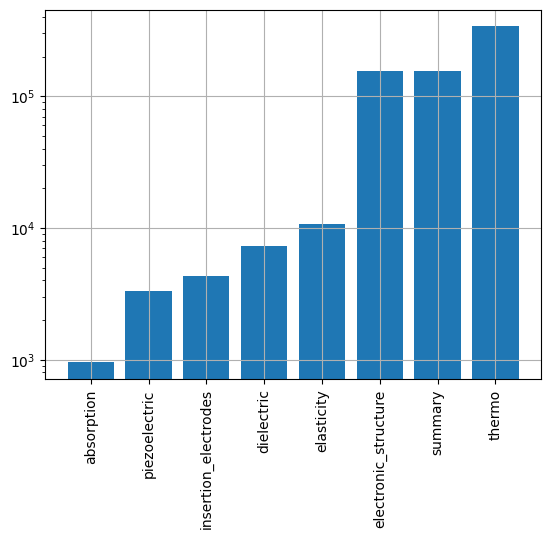

In [193]:
plt.bar(count_df_distinct['api_name'], count_df_distinct['count'], log=True)
plt.xticks(rotation=90)
plt.grid()

available_fields in APIs

In [198]:
api_list = ['absorption', 'bonds', 'chemenv', 'dielectric', 'elasticity', 
            'insertion_electrodes', 'electronic_structure', 'electronic_structure_bandstructure', 
            'electronic_structure_dos', 'eos', 'grain_boundaries', 'magnetism', 'oxidation_states', 
            'phonon', 'piezoelectric', 'provenance', 'similarity', 'substrates', 'summary', 
            'surface_properties', 'tasks', 'thermo', 'xas', 'robocrys', 'synthesis']
# mpr.summary.available_fields

for api_name in api_list:
    api_class = getattr(mpr.materials, api_name)
    print(f"{api_name}: {api_class.available_fields}")
    print('-------------------------------')
# api_class = getattr(mpr.materials, api_name)
# docs = api_class.search(fields=['elements'], num_chunks=1, chunk_size=10)

absorption: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'task_id', 'energies', 'energy_max', 'absorption_coefficient', 'average_imaginary_dielectric', 'average_real_dielectric', 'bandgap', 'nkpoints']
-------------------------------
bonds: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure_graph', 'method', 'bond_types', 'bond_length_stats', 'coordination_envs', 'coordination_envs_anonymous']
-------------------------------
chemenv: ['builder_meta', 'nsites', 'elements', 'nelements